In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.gridspec import GridSpec 
%matplotlib inline

In [2]:
data = pd.read_csv('../input/Video_Games_Sales_as_at_22_Dec_2016.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


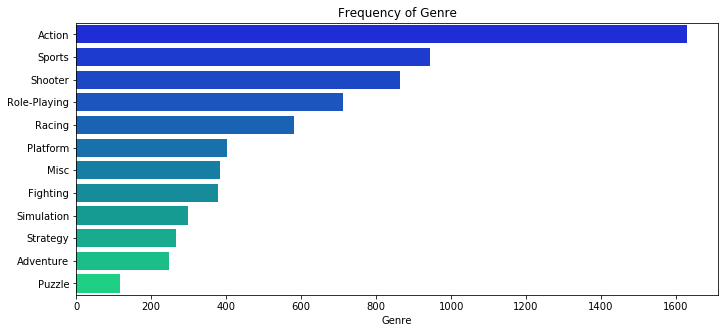

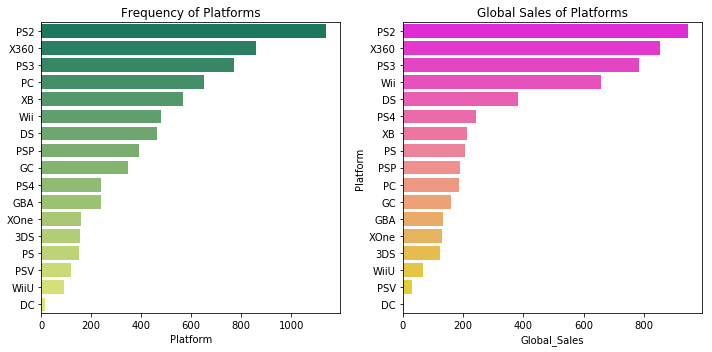

In [6]:
plt.figure(figsize = [11.5,5])
Genre = data['Genre'].value_counts()
sns.barplot(x = Genre, y = Genre.index, palette = 'winter', )
plt.title('Frequency of Genre')
f,ax = plt.subplots(1,2,figsize = [10,5])
Platform = data['Platform'].value_counts()
sns.barplot(x = Platform, y = Platform.index, palette = 'summer',ax = ax[0])
ax[0].set_title('Frequency of Platforms')
Sales_by_platform = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False)
sns.barplot(x = Sales_by_platform, y = Sales_by_platform.index, palette = 'spring',ax = ax[1])
ax[1].set_title('Global Sales of Platforms')
plt.tight_layout()

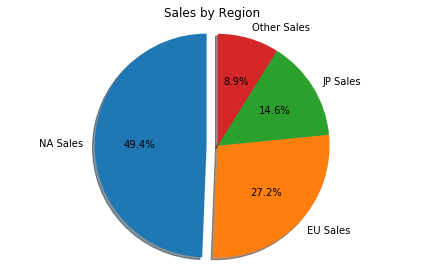

In [4]:
Pies = data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
plt.pie(Pies,startangle = 90,autopct='%1.1f%%',explode = [0.1,0,0,0], shadow = True, 
        labels = ['NA Sales','EU Sales', 'JP Sales','Other Sales'])
plt.axis('equal',)
plt.title('Sales by Region')
plt.tight_layout()

In [5]:
data.dropna(inplace = True)

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [7]:
data['User_Score'] = pd.to_numeric(data['User_Score'])

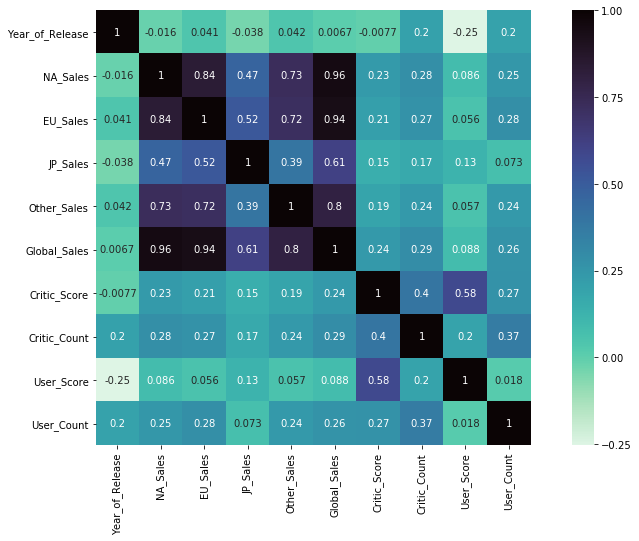

In [8]:
data_corr = data.corr()
plt.figure(figsize = [15,8])
sns.heatmap(data_corr,square = True, annot = True, cmap = 'mako_r')

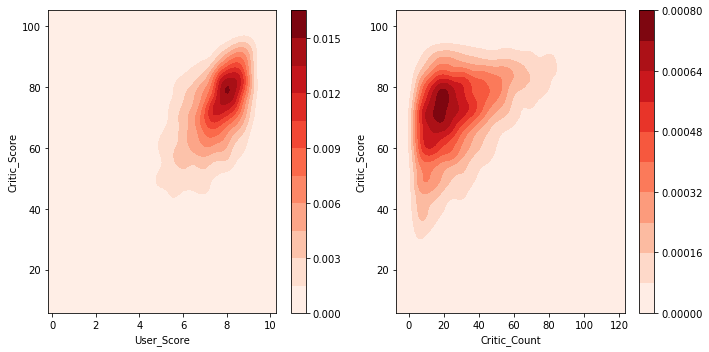

In [9]:
f,ax = plt.subplots(1, 2, figsize = [10,5], )
cmap = sns.cubehelix_palette(n_colors = 20, start = 0, light = 0.9, gamma = 1, rot = 0.1, hue = 1, as_cmap = True)
sns.kdeplot(data = data['User_Score'], data2 = data['Critic_Score'], shade = True, cbar = True,
            cmap = 'Reds', ax = ax[0])
sns.kdeplot(data = data['Critic_Count'], data2 = data['Critic_Score'], shade = True, cbar = True,
            cmap = 'Reds', ax = ax[1])
f.tight_layout()

In [10]:
data['Company'] = data['Platform'].replace(['PC','XOne','X360','XB'], 'Microsoft').replace(
    ['DS', 'Wii', 'WiiU', '3DS', 'GC', 'GBA'],'Nintendo').replace(
    ['PS2', 'PS3', 'PS4','PSP','PS','PSV','DC'],'Sony')

In [69]:
print(plt.style.available)

['dark_background', 'grayscale', 'seaborn-white', 'seaborn-darkgrid', 'classic', 'seaborn-notebook', '_classic_test', 'seaborn-bright', 'seaborn-talk', 'seaborn-pastel', 'seaborn-poster', 'fivethirtyeight', 'ggplot', 'seaborn-ticks', 'seaborn', 'seaborn-deep', 'seaborn-paper', 'seaborn-colorblind', 'seaborn-muted', 'seaborn-dark-palette', 'seaborn-whitegrid', 'seaborn-dark', 'bmh']


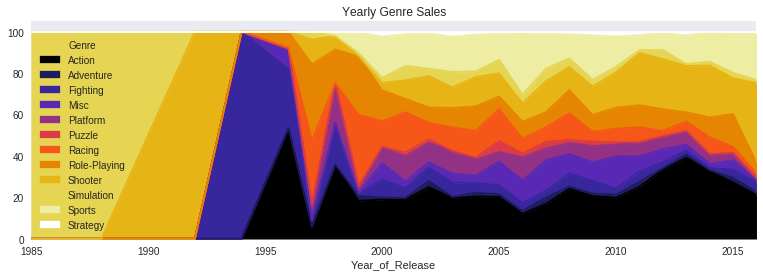

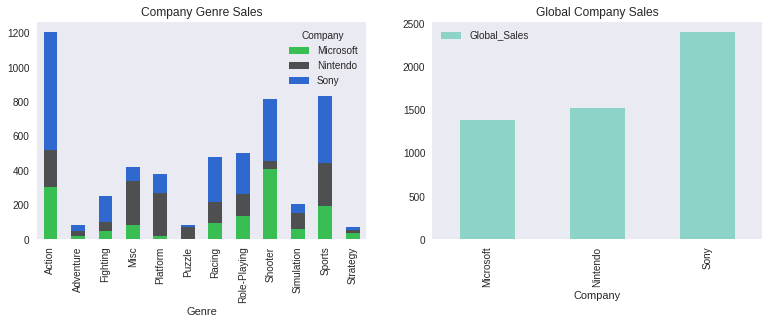

In [71]:
plt.style.use(['seaborn-dark'])
genre_sales_by_year = data.groupby(['Year_of_Release','Genre'])['Global_Sales'].sum()*100/data.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre_sales_by_year = genre_sales_by_year.unstack()
Company_Sales_by_genre = data.groupby(['Genre','Company'])['Global_Sales'].sum().unstack()
Company_sales = data.groupby('Company')['Global_Sales'].sum()

genre_sales_by_year.plot(kind = 'area', stacked = True, colormap = 'CMRmap', figsize = (13,4),grid = False)
plt.title('Yearly Genre Sales')
f,ax = plt.subplots(1,2,figsize = [13,4])
Company_Sales_by_genre.plot(kind = 'bar', stacked = True,color = ['#38be52','#4e4f51','#2f69cf'],ax = ax[0] )
ax[0].set_title('Company Genre Sales')
Company_sales.plot(kind = 'bar',legend = True,ax = ax[1])
ax[1].set_title('Global Company Sales')